In [ ]:
import pandas as pd
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
captureSize = 35.8 #for tmb claculation
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)


In [ ]:
#! mkdir -p /n/data1/hms/dbmi/zitnik/lab/users/was966/

In [ ]:
itrp_data_path = '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/SKCM_v2/'
tcga_data_path = '/n/data1/hms/dbmi/zitnik/lab/users/was966/TCGA/GDC_v37/'

In [ ]:
! ls -lh /n/data1/hms/dbmi/zitnik/lab/users/was966/TCGA/GDC_v37/*.TABLE

In [ ]:
! ls -lh /n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/SKCM_v2/*.TABLE

In [ ]:
skcm_patient = pd.read_pickle(os.path.join(itrp_data_path, 'PATIENTS.TABLE'))
skcm_tpm = pd.read_pickle(os.path.join(itrp_data_path, 'TPM.TABLE'))
skcm_tpm_correct = pd.read_pickle(os.path.join(itrp_data_path, 'TPM_CORRECTION.TABLE'))

tcga_gene = pd.read_pickle(os.path.join(tcga_data_path, 'GENE.TABLE'))
tcga_patient = pd.read_pickle(os.path.join(tcga_data_path, 'PATIENTS.TABLE'))
tcga_tpm = pd.read_pickle(os.path.join(tcga_data_path, 'TPM.TABLE'))

In [ ]:
ensid_freeman = pd.Series(dict(zip(skcm_tpm.index.map(lambda x:x.split('.')[0]), skcm_tpm.index)))
ensid_freeman.name = 'ensid_freeman'
common_genes = set(tcga_tpm.columns.map(lambda x:x.split('.')[0])) & set(skcm_tpm.index.map(lambda x:x.split('.')[0]))
common_genes = list(common_genes)
print(len(common_genes))

tcga_gene = tcga_gene.loc[common_genes]
tcga_gene = tcga_gene[tcga_gene.gene_type == 'protein_coding']
tcga_gene = tcga_gene.join(ensid_freeman)

tcga_tpm = tcga_tpm[tcga_gene.ensid_v36]
tcga_tpm.columns = tcga_gene.gene_name.tolist()

skcm_tpm = skcm_tpm.T[tcga_gene.ensid_freeman]
skcm_tpm.columns = tcga_gene.gene_name.tolist()

skcm_tpm_correct = skcm_tpm_correct.T[tcga_gene.ensid_freeman]
skcm_tpm_correct.columns = tcga_gene.gene_name.tolist()

In [77]:
skcm_tpm

,TSC22D3,PLAG1,KIF1A,S100G,ZNF764,ZNF286A,KDELR2,HDAC11,SLITRK4,EPHA7,...,LGALS1,MXI1,KCNA6,CPEB4,CALML6,FANCC,STK32B,IGF2R,TTC39C,LRP3
Patient100_T_P,35.13,1.15,0.05,0.13,6.38,13.37,49.42,9.13,0.40,0.00,...,288.74,17.05,0.07,26.72,0.02,4.85,1.54,74.32,14.55,5.51
Patient102_T_P,6.86,5.12,1.43,0.14,1.96,11.70,56.67,3.64,0.11,0.09,...,318.66,30.25,0.13,33.00,0.16,4.70,3.33,40.62,10.36,0.57
Patient105_T_P,1.95,2.90,0.02,0.45,0.22,8.91,35.77,1.00,0.00,0.00,...,44.90,18.17,0.00,12.60,0.00,2.63,3.22,22.63,0.25,0.37
Patient106_T_P,4.64,0.87,0.17,0.00,0.65,12.51,36.35,4.11,0.12,0.00,...,106.08,39.19,0.00,22.96,0.05,3.69,1.05,77.78,1.47,2.32
Patient10_T_M,4.02,1.47,0.27,0.06,1.53,13.45,39.22,2.44,0.03,0.07,...,86.93,33.38,0.04,30.61,0.16,4.86,2.17,27.25,2.22,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pt94_Pre_AD732850,32.58,0.66,3.92,0.00,2.67,6.40,129.17,4.74,0.17,0.01,...,2567.60,38.99,0.11,6.76,0.00,2.64,14.54,89.99,3.00,8.38
Pt98_Pre_AD733586,18.33,7.35,4.48,0.00,2.09,7.87,78.46,18.05,0.00,0.00,...,256.62,101.00,0.07,16.70,0.00,4.40,0.35,12.60,16.03,7.06
Pt101_Pre_AD486328,97.84,3.48,0.00,0.00,5.57,8.70,52.30,3.20,0.17,0.00,...,293.11,10.45,0.87,8.93,0.98,4.30,3.28,14.03,25.26,1.93
Pt103_Pre_AE134058,46.98,0.33,0.00,0.00,1.81,2.33,55.31,4.08,0.60,0.00,...,5285.10,16.74,0.14,0.77,0.69,0.43,1.19,3.28,10.75,9.85


## load tcga & mutation data

## load mapping data

In [4]:
name2id = pd.read_pickle('/n/data1/hms/dbmi/zitnik/lab/users/was966/TCGA/GDC_v37/gene_name_id.map')
eid2name = pd.read_pickle('/n/data1/hms/dbmi/zitnik/lab/users/was966/TCGA/GDC_v37/gene_ensid_name.map')
id2name = pd.read_pickle('/n/data1/hms/dbmi/zitnik/lab/users/was966/TCGA/GDC_v37/gene_id_name.map')
id2name.index = id2name.index.map(lambda x:x.split('.')[0])

In [8]:
df_mRNA_tpm_pre_log = np.log2(df_mRNA_tpm_pre+1)
var = df_mRNA_tpm_pre_log.var(axis=1)
sgv = var[var > 1].index
df_mRNA_tpm_pre_log = df_mRNA_tpm_pre_log.loc[sgv]

In [9]:
df_mRNA_tpm_pre_log

,Patient100_T_P,Patient102_T_P,Patient105_T_P,Patient106_T_P,Patient10_T_M,Patient112_T_P,Patient116_T_P,Patient117_T_P,Patient11_T_M,Patient121_T_P,...,Pt84_Pre_AD486532,Pt85_Pre_AD486329,Pt89_Pre_AE070951,Pt90_Pre_AD467873,Pt92_Pre_AE134060,Pt94_Pre_AD732850,Pt98_Pre_AD733586,Pt101_Pre_AD486328,Pt103_Pre_AE134058,Pt106_Pre_AD502250
ENSG00000237683.5,6.644145,4.032101,1.356144,3.148934,3.967169,3.531069,4.881665,4.710944,4.043519,4.584963,...,0.475085,0.678072,1.895303,1.565597,1.963474,0.622930,1.111031,2.869871,1.144046,2.283922
ENSG00000235249.1,2.244887,2.381283,0.992768,1.985500,1.918386,0.799087,0.948601,1.510962,0.910733,1.316146,...,0.000000,0.014355,0.000000,0.000000,0.056584,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000185097.2,2.244887,2.381283,2.560715,1.985500,1.918386,0.799087,4.201634,1.510962,0.910733,1.316146,...,0.000000,0.014355,0.000000,0.000000,0.056584,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000188976.6,4.071248,4.665620,1.906891,4.114367,5.257765,3.388190,4.758623,4.103498,4.567424,4.455492,...,4.833902,5.896514,5.665336,4.881175,5.031660,5.000451,4.347666,4.687061,3.435629,5.407013
ENSG00000187608.5,3.337711,0.356144,0.748461,1.565597,2.505891,2.408712,2.137504,3.179511,1.807355,2.014355,...,2.275007,6.752749,5.520422,6.718362,7.756356,2.903038,3.691534,6.970739,5.694880,4.841470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000212907.2,1.182692,0.731183,1.752749,4.175525,4.125982,0.000000,2.636915,3.025029,5.212958,1.028569,...,13.763316,13.140638,13.330637,13.607446,14.715158,14.061456,13.637191,12.537679,11.965496,14.106808
ENSG00000198886.2,3.600508,2.622930,4.947199,4.854993,5.260026,1.748461,3.977280,3.669027,6.300307,3.418190,...,13.754679,13.046612,13.310329,13.767253,14.692071,14.027474,13.446566,12.375908,12.315263,14.020025
ENSG00000198786.2,3.085765,2.117695,3.844988,4.248687,4.745775,1.195348,3.257011,3.060047,5.293518,2.392317,...,12.662602,11.572605,12.133014,11.727027,12.687157,12.281669,11.947783,11.207990,9.794854,11.807677
ENSG00000198695.2,3.266037,1.887525,3.647315,4.340562,4.906410,0.704872,3.375735,3.117695,5.475733,2.666757,...,12.773510,11.460661,12.036380,11.593765,12.613421,12.417009,11.842861,11.105319,10.425531,11.486634


In [115]:
cohort_mean = df_mRNA_tpm_pre_log.T.join(dfc.cohort).groupby('cohort').mean().T
cohort_rank = cohort_mean.transform('rank', axis=0)

In [119]:
sgs = []
for i in range(len(cohort_rank.columns)):
    for j in range(i):
        c1 = cohort_rank.columns[i]
        c2 = cohort_rank.columns[j]
        s = cohort_rank[c1] - cohort_rank[c2]
        idxs = s.abs()[s.abs() < 500].index
        sgs.append(idxs)

In [124]:
sgc = list(set.intersection(*[set(list) for list in sgs]))
len(sgc)

555

In [164]:
dfsg = pd.DataFrame(index=sgc)
dfsg['gname'] = dfsg.index.map(lambda x:x.split('.')[0]).map(eid2name)
dfsg.gname.dropna().to_csv('selected_cross_genes.csv')
dfsg

,gname
ENSG00000075785.8,RAB7A
ENSG00000146701.7,MDH2
ENSG00000156467.5,UQCRB
ENSG00000115414.14,FN1
ENSG00000114391.8,RPL24
...,...
ENSG00000203782.5,LORICRIN
ENSG00000132475.4,H3-3B
ENSG00000099957.12,P2RX6
ENSG00000134419.11,RPS15A


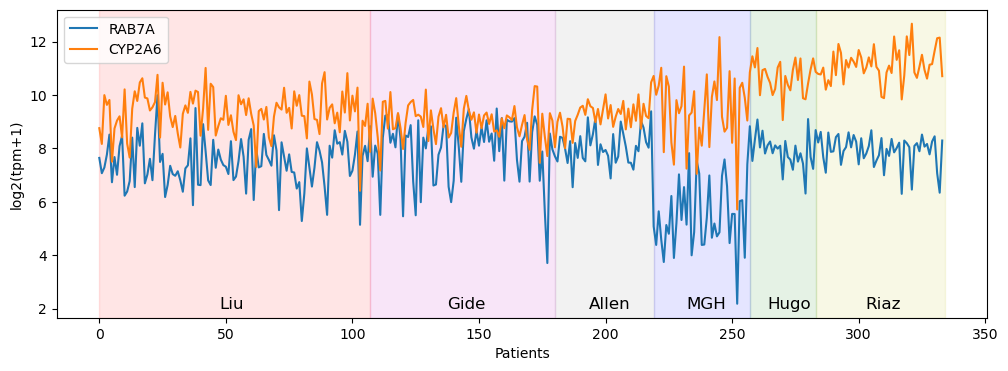

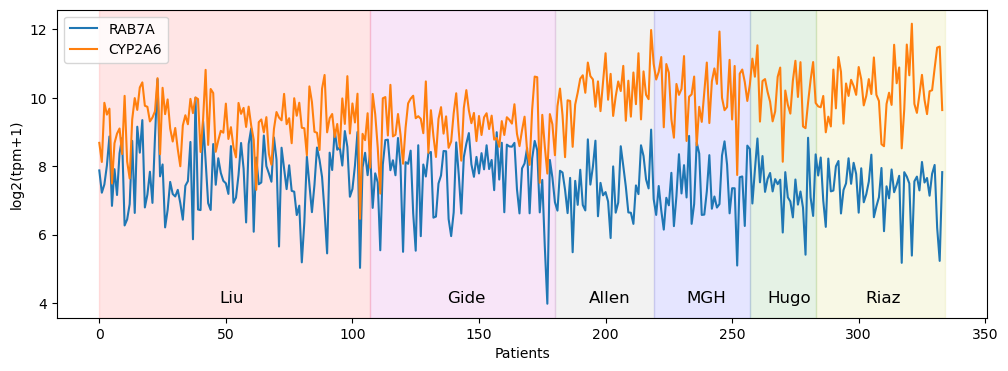

In [173]:
namedict = {'ENSG00000075785.8': 'RAB7A', 'ENSG00000134419.11': 'CYP2A6'}
pre = np.log2(df_mRNA_tpm_pre.T[namedict.keys()]+1).rename(columns=namedict).join(dfc.cohort)
correct = df_mRNA_tpm_pre_correct.T[namedict.keys()].rename(columns=namedict).join(dfc.cohort)

cohorts = ['Gide',  'Liu', 'Allen', 'MGH', 'Riaz', 'Hugo']

df = pre.reset_index(drop=True).reset_index()
df = df.set_index(['cohort', 'index']).stack().to_frame(name = 'tpm').reset_index()

fig, ax = plt.subplots(figsize=(12,4))
g = sns.lineplot(data=df, x="index", y="tpm", hue='level_2',ax=ax)

overlay = {'Gide':'m', 'Allen':'gray','Liu':'r',  'MGH':'b', 'Riaz':'y', 'Hugo':'g'}

for cohort in cohorts:
    df1 = df[df.cohort == cohort]
    v = overlay.get(df1['cohort'].unique()[0])
    g.axvspan(min(df1['index']), max(df1['index'])+1, color=v, alpha=0.1)
    g.text(((min(df1['index'])+max(df1['index'])+1) / 2)-6, 2,'{}'.format(df1['cohort'].unique()[0]), fontsize=12)

ax.set_ylabel('log2(tpm+1)')
ax.set_xlabel('Patients')
plt.legend()

df = correct.reset_index(drop=True).reset_index()
df = df.set_index(['cohort', 'index']).stack().to_frame(name = 'tpm').reset_index()

fig, ax = plt.subplots(figsize=(12,4))
g = sns.lineplot(data=df, x="index", y="tpm", hue='level_2',  ax=ax)

overlay = {'Gide':'m', 'Allen':'gray','Liu':'r',  'MGH':'b', 'Riaz':'y', 'Hugo':'g'}

for cohort in cohorts:
    df1 = df[df.cohort == cohort]
    v = overlay.get(df1['cohort'].unique()[0])
    g.axvspan(min(df1['index']), max(df1['index'])+1, color=v, alpha=0.1)
    g.text(((min(df1['index'])+max(df1['index'])+1) / 2)-6, 4,'{}'.format(df1['cohort'].unique()[0]), fontsize=12)


ax.set_ylabel('log2(tpm+1)')
ax.set_xlabel('Patients')
plt.legend()

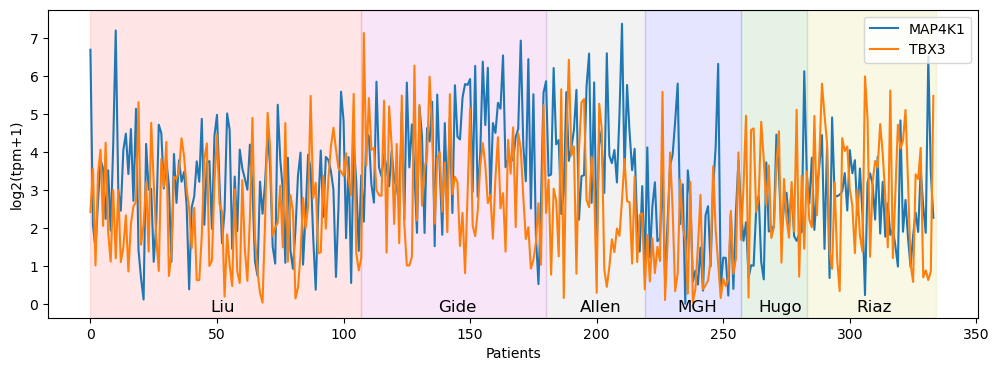

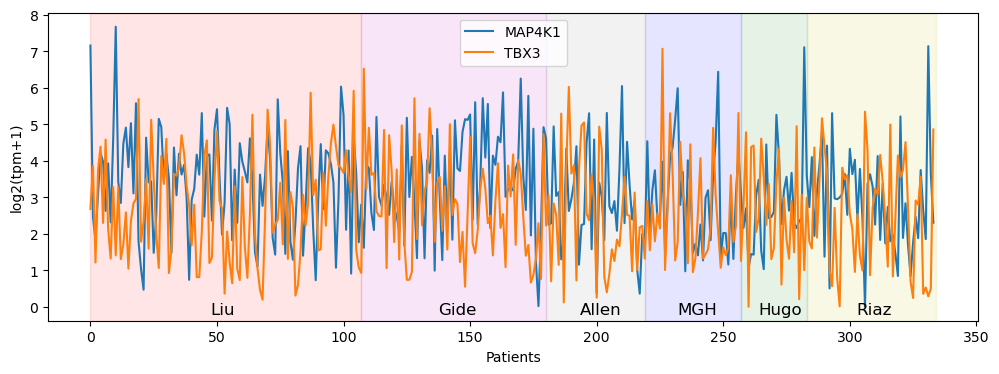

In [26]:
namedict = {'ENSG00000104814.8': 'MAP4K1', 'ENSG00000135111.10': 'TBX3'}
pre = np.log2(df_mRNA_tpm_pre.T[namedict.keys()]+1).rename(columns=namedict).join(dfc.cohort)
correct = df_mRNA_tpm_pre_correct.T[namedict.keys()].rename(columns=namedict).join(dfc.cohort)

cohorts = ['Gide',  'Liu', 'Allen', 'MGH', 'Riaz', 'Hugo']

df = pre.reset_index(drop=True).reset_index()
df = df.set_index(['cohort', 'index']).stack().to_frame(name = 'tpm').reset_index()

fig, ax = plt.subplots(figsize=(12,4))
g = sns.lineplot(data=df, x="index", y="tpm", hue='level_2',ax=ax)

overlay = {'Gide':'m', 'Allen':'gray','Liu':'r',  'MGH':'b', 'Riaz':'y', 'Hugo':'g'}

for cohort in cohorts:
    df1 = df[df.cohort == cohort]
    v = overlay.get(df1['cohort'].unique()[0])
    g.axvspan(min(df1['index']), max(df1['index'])+1, color=v, alpha=0.1)
    g.text(((min(df1['index'])+max(df1['index'])+1) / 2)-6, -0.2,'{}'.format(df1['cohort'].unique()[0]), fontsize=12)

ax.set_ylabel('log2(tpm+1)')
ax.set_xlabel('Patients')
plt.legend()

df = correct.reset_index(drop=True).reset_index()
df = df.set_index(['cohort', 'index']).stack().to_frame(name = 'tpm').reset_index()

fig, ax = plt.subplots(figsize=(12,4))
g = sns.lineplot(data=df, x="index", y="tpm", hue='level_2',  ax=ax)

overlay = {'Gide':'m', 'Allen':'gray','Liu':'r',  'MGH':'b', 'Riaz':'y', 'Hugo':'g'}

for cohort in cohorts:
    df1 = df[df.cohort == cohort]
    v = overlay.get(df1['cohort'].unique()[0])
    g.axvspan(min(df1['index']), max(df1['index'])+1, color=v, alpha=0.1)
    g.text(((min(df1['index'])+max(df1['index'])+1) / 2)-6, -0.2,'{}'.format(df1['cohort'].unique()[0]), fontsize=12)


ax.set_ylabel('log2(tpm+1)')
ax.set_xlabel('Patients')
plt.legend()

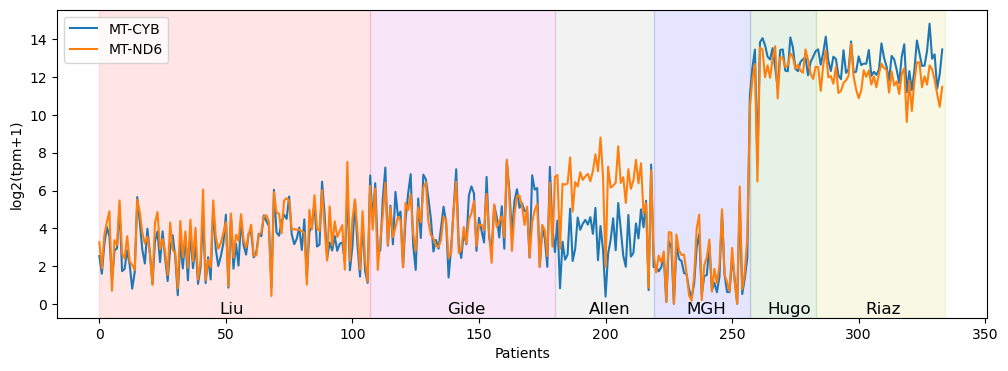

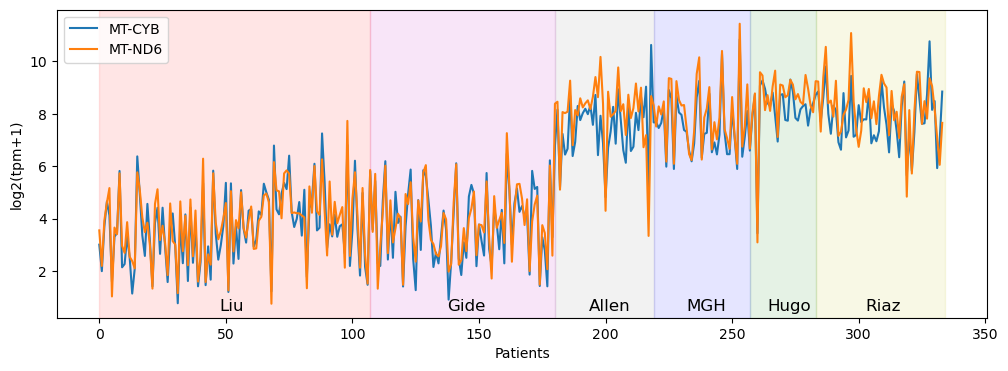

In [27]:
namedict = {'ENSG00000198727.2': 'MT-CYB','ENSG00000198695.2': 'MT-ND6'}
pre = np.log2(df_mRNA_tpm_pre.T[namedict.keys()]+1).rename(columns=namedict).join(dfc.cohort)
correct = df_mRNA_tpm_pre_correct.T[namedict.keys()].rename(columns=namedict).join(dfc.cohort)

cohorts = ['Gide',  'Liu', 'Allen', 'MGH', 'Riaz', 'Hugo']

df = pre.reset_index(drop=True).reset_index()
df = df.set_index(['cohort', 'index']).stack().to_frame(name = 'tpm').reset_index()

fig, ax = plt.subplots(figsize=(12,4))
g = sns.lineplot(data=df, x="index", y="tpm", hue='level_2',ax=ax)

overlay = {'Gide':'m', 'Allen':'gray','Liu':'r',  'MGH':'b', 'Riaz':'y', 'Hugo':'g'}

for cohort in cohorts:
    df1 = df[df.cohort == cohort]
    v = overlay.get(df1['cohort'].unique()[0])
    g.axvspan(min(df1['index']), max(df1['index'])+1, color=v, alpha=0.1)
    g.text(((min(df1['index'])+max(df1['index'])+1) / 2)-6, -0.5,'{}'.format(df1['cohort'].unique()[0]), fontsize=12)

ax.set_ylabel('log2(tpm+1)')
ax.set_xlabel('Patients')
plt.legend()

df = correct.reset_index(drop=True).reset_index()
df = df.set_index(['cohort', 'index']).stack().to_frame(name = 'tpm').reset_index()

fig, ax = plt.subplots(figsize=(12,4))
g = sns.lineplot(data=df, x="index", y="tpm", hue='level_2',  ax=ax)

overlay = {'Gide':'m', 'Allen':'gray','Liu':'r',  'MGH':'b', 'Riaz':'y', 'Hugo':'g'}

for cohort in cohorts:
    df1 = df[df.cohort == cohort]
    v = overlay.get(df1['cohort'].unique()[0])
    g.axvspan(min(df1['index']), max(df1['index'])+1, color=v, alpha=0.1)
    g.text(((min(df1['index'])+max(df1['index'])+1) / 2)-6, 0.5,'{}'.format(df1['cohort'].unique()[0]), fontsize=12)


ax.set_ylabel('log2(tpm+1)')
ax.set_xlabel('Patients')
plt.legend()